In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats

import sys
sys.path.append('../')
import tools

In [85]:
def boxplot(column1, column2='ces', ylim=None):
    tmp = df[[column1, column2]].dropna()
    low_q = np.percentile(tmp[column2],25)
    high_q = np.percentile(tmp[column2],75)
    low = tmp[tmp[column2]<low_q]
    high = tmp[tmp[column2]>high_q]
    plt.boxplot([low[column1].dropna(),high[column1].dropna()])
    if ylim:
        plt.ylim(ylim)
    plt.title(str(column1)+' for low and high '+column2+' tumors')
    print('Pvalue of t-test on high and low: ', scipy.stats.mannwhitneyu(low[column1], high[column1]))
    plt.show()

In [86]:
cancers = ['lung_adeno', 'head_neck_SCC','colorectal']
cancer = cancers[2]

In [88]:
df1 = tools.load_aggr('../data/'+cancer+'/ces.txt', column='ces')
df2 = tools.load_mutation('../data/'+cancer+'/mutation.txt')
df3 = tools.load_data('../data/'+cancer+'/pd1_mut.txt', cat='mut')
df4 = tools.load_data('../data/'+cancer+'/pd1_expr.txt', cat='expr')

In [89]:
df = df2.merge(df1, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df3, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df4, how='outer', left_on='Sample ID', right_index=True)
df = df.set_index('Sample ID')
df.head()

,Mutation Count,CNA,ces,PDCD1_mut,PDCD1_expr
Sample ID,,,,,
TCGA-A6-2675-01,NaN,0.220794,2249.65,NaN,32.9063
TCGA-A6-5667-01,NaN,0.546520,4956.45,NaN,15.6863
TCGA-AA-3655-01,NaN,0.139335,6215.71,NaN,24.1076
TCGA-AA-3660-01,NaN,0.338368,6201.61,NaN,26.087
TCGA-AA-3662-01,NaN,0.441361,5130.71,NaN,25.3165


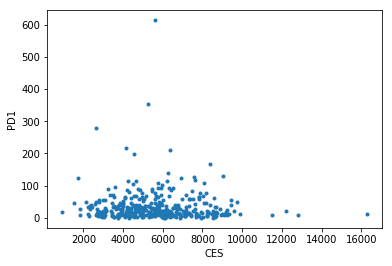

Correlation: -0.0694325198386
pvalue: 0.17566185252


In [90]:
plt.figure()
plt.scatter(df['ces'],df['PDCD1_expr'], marker='.')
plt.xlabel('CES')
plt.ylabel('PD1')
plt.show()
tmp = df[['ces','PDCD1_expr']].dropna()
correlation, pvalue = scipy.stats.spearmanr(tmp['ces'], tmp['PDCD1_expr'])
print('Correlation: %s' % correlation)
print('pvalue: %s' %pvalue)

Pvalue of t-test on high and low:  MannwhitneyuResult(statistic=4267.0, pvalue=0.18823515166915766)


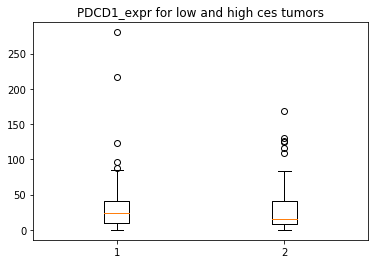

In [95]:
boxplot('PDCD1_expr')

In [92]:
df['ces_n'] = df['ces'] / np.sqrt(np.var(df['ces']))
df['PDCD1_expr_n'] = df['PDCD1_expr'] / np.sqrt(np.var(df['PDCD1_expr']))
print(np.var(df['ces_n']), np.var(df['PDCD1_expr_n']))

1.0 1.0


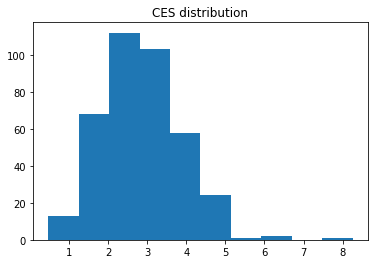

In [93]:
plt.figure()
plt.hist(df['ces_n'].dropna())
plt.title('CES distribution')
plt.show()

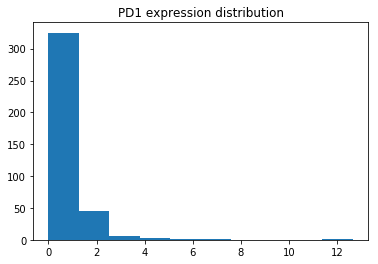

In [94]:
plt.figure()
plt.hist(df['PDCD1_expr_n'].dropna())
plt.title('PD1 expression distribution')
plt.show()